# Mall_Customer_Segmentation_Project

# Preparation

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [98]:
data = pd.read_csv('Mall_Customers.csv')

In [99]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [100]:
data.drop('CustomerID', axis=1, inplace=True)

In [101]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [107]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

gender_mapping = {index: label for index, label in enumerate(encoder.classes_)}

gender_mapping

{0: 0, 1: 1}

# Expolaratory Data Analysis

In [117]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


# Standardize Data

In [108]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [109]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


# DIMENSIONALITY REDUCTION TECHNIQUES

# PCA

In [110]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_result

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

# t-SNE

In [113]:
from sklearn.manifold import TSNE

In [114]:
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(scaled_data)

In [119]:
tsne_result 

array([[ 2.38194799e+00, -1.16755848e+01],
       [ 9.45381701e-01, -1.06768694e+01],
       [-8.36609459e+00,  1.06618853e+01],
       [-1.10829363e+01,  5.89310312e+00],
       [-7.88816214e+00,  9.23443413e+00],
       [-1.09285021e+01,  5.76667690e+00],
       [-7.69787884e+00,  1.11437206e+01],
       [-1.15086250e+01,  5.20137596e+00],
       [ 1.00093565e+01, -1.11224928e+01],
       [-1.07438593e+01,  6.35572004e+00],
       [ 1.01162195e+01, -1.13216438e+01],
       [-1.21051846e+01,  5.55099010e+00],
       [-5.97601652e+00,  1.25381384e+01],
       [-1.08531399e+01,  5.73980379e+00],
       [ 7.72332335e+00, -1.08355865e+01],
       [ 1.12580943e+00, -1.05792665e+01],
       [-7.47406816e+00,  9.71868706e+00],
       [ 1.66412270e+00, -1.09774046e+01],
       [ 8.73566055e+00, -1.16074514e+01],
       [-1.20878782e+01,  5.53819084e+00],
       [ 6.98530102e+00, -1.09396868e+01],
       [ 1.64422965e+00, -1.05426893e+01],
       [-6.81595707e+00,  1.19106760e+01],
       [ 1.

# Visualization

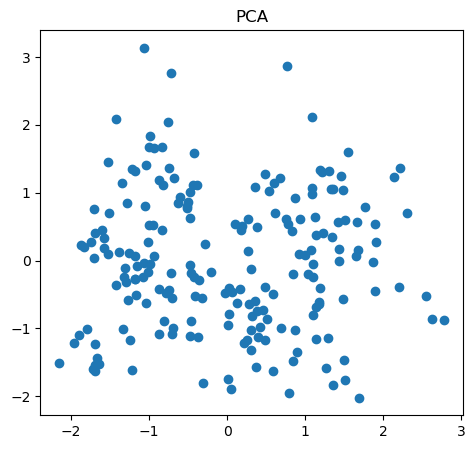

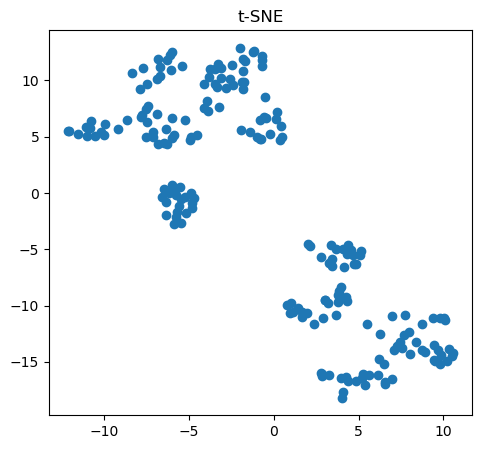

In [118]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(pca_result[:, 0], pca_result[:,1])
plt.title('PCA')


plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.scatter(tsne_result[:, 0], tsne_result[:,1])
plt.title('t-SNE')


plt.show()
